# **KNMI Model Run Test Set and Extract Model Output**

This script is used for the following:
1. load test data set (day or night images)
2. load best model (day or night)
3. use model to predict image labels
4. store model evaluation metrics
5. visualize images (including false negative/false positives, etc.)

## **Load test dataset**

In [1]:
# ORIGINAL TEST SETS (BALANCED)

# choose day or nighttest image directory
#test_dir = '/home/ubuntu/michael/day/test' # day images only
#test_dir = '/home/ubuntu/michael/night/test' # night images only

In [2]:
# NEW TEST SETS (UNBALANCED)
# choose day or nighttest image directory
#test_dir = '/home/ubuntu/michael/unbalanced_day_test' # day images only
test_dir = '/home/ubuntu/michael/unbalanced_night_test' # night images only

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
# choose input size dependent on model choice

# set input size for day model
#img_size = (200, 200)
#img_shape = (200, 200, 3)

# set input size for night model
img_size = (100, 100)
img_shape = (100, 100, 3)

In [5]:
test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0) #scale 

In [6]:
test_it = test_datagen.flow_from_directory(directory = test_dir, classes = ['nofog', 'fog'], class_mode = 'binary', # validation_iterator
                    batch_size = 16, target_size=img_size)

Found 3153 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in test_it:
    print(f'data batch shape: {data_batch.shape}')
    print(f'labels batch shape: {labels_batch.shape}')
    break

data batch shape: (16, 100, 100, 3)
labels batch shape: (16,)


In [8]:
test_it.class_indices

{'nofog': 0, 'fog': 1}

In [9]:
# store labels in a list
test_it.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## **Load model used**

In [10]:
import h5py    
import numpy as np 

In [11]:
# point toward model directory
model_path = '/home/ubuntu/michael/scripts/models/'

In [12]:
# choose day or night model

# day model
#model_file = 'best_Day_Model.h5'

# night model
model_file = 'best_Night_Model.h5'

In [13]:
with h5py.File(model_path + model_file, 'r') as f:
    # list all groups
    print('Keys: %s' % f.keys())
    a_group_key = list(f.keys())[0]
    
    # get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>


In [14]:
from tensorflow.keras.models import load_model

In [15]:
# load weights from checkpoint
model = load_model(model_path + model_file)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 91, 91, 16)        4816      
_________________________________________________________________
dropout_1 (Dropout)          (None, 91, 91, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 8)         3208      
_________________________________________________________________
dropout_2 (Dropout)          (None, 41, 41, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 8)        

## **Load dataframe with test set images**

In [17]:
# point to source directory and file
src_dir = '/home/ubuntu/michael/my_pickles/'

In [ ]:
# THESE ARE THE BALANCED TEST SET DATAFRAMES

# choose day or night sample test dataframe
#infile = 'day_test_df.pkl' # day only dataframe'
#infile = 'night_test_df.pkl'

In [18]:
# THESE ARE THE UNBALANCED TEST SET DATAFRAMES

# choose day or night sample test dataframe
#infile = 'new_day_test_sample_ub.pkl' # day only dataframe'
infile = 'new_night_test_sample_ub.pkl' 

In [19]:
import pandas as pd

In [20]:
# assign saved dataframe to sample dataframe 
test_df = pd.read_pickle(src_dir + infile)
test_df

,filename,label,day_phase,phase,filepath,y_true
0,A27-HM645-ID10971_20190322_0230.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A27...,1
1,A27-HM657-ID10966_20190425_2200.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A27...,1
2,A9-HM427-ID12855_20190324_0500.jpg,Fog,20,Night,/home/ubuntu/michael/nl_images/images_data/A9-...,1
3,A1-HM61-ID12961_20190429_2141.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A1-...,1
4,A27-HM645-ID10971_20190322_0150.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A27...,1
...,...,...,...,...,...,...
3148,A50-HM1835-ID11509_20170905_2340.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A50...,0
3149,A5-HM126-ID13778_20181009_1921.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A5-...,0
3150,A50-HM1927-ID11542_20191230_1651.jpg,No Fog,21,Night,/home/ubuntu/michael/nl_images/images_data/A50...,0
3151,A5-HM116-ID13776_20170916_0031.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A5-...,0


In [21]:
# create a list of the ground-truth labels
labels = test_df.y_true.tolist()
len(labels)

3153

In [22]:
# visualize classes count
test_df.groupby('label').count()

,filename,day_phase,phase,filepath,y_true
label,,,,,
Fog,153,153,153,153,153
No Fog,3000,3000,3000,3000,3000


## **Load test set images to make predictions**

In [23]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import os

In [24]:
# image source location
img_path = '/home/ubuntu/backup_images_2/images01062021'

In [25]:
# import images and convert to arrays for prediction
image_list = []
for filepath in test_df.filepath.values:
    fn = os.path.basename(filepath)
    fp = os.path.join(img_path, fn)
    img = load_img(fp, target_size = img_size)
    img = img_to_array(img)
    img = img / 255.
    image_list.append(img)
images = np.asarray(image_list)
images.shape

(3153, 100, 100, 3)

## **Make probability predictions for test set**

In [26]:
# make predictions on images where three probabilities are generated
probabilities = model.predict(images)
probabilities = np.around(probabilities, decimals=2)
len(probabilities)

3153

In [27]:
# create dataframe with filenames and probabilities for three classes
prob_df = pd.DataFrame()
prob_df['Filename'] = test_df.filename
prob_df['Cannot Say'] = probabilities[:,0] # probabilities[0] = cannot say
prob_df['Fog'] = probabilities[:, 1] # probabilities[1] = fog
prob_df['No Fog'] = probabilities[:, 2] # probabilities[2] = no fog
prob_df.set_index('Filename', inplace=True)
prob_df

,Cannot Say,Fog,No Fog
Filename,,,
A27-HM645-ID10971_20190322_0230.jpg,0.07,0.90,0.03
A27-HM657-ID10966_20190425_2200.jpg,0.08,0.05,0.86
A9-HM427-ID12855_20190324_0500.jpg,0.11,0.07,0.82
A1-HM61-ID12961_20190429_2141.jpg,0.10,0.04,0.86
A27-HM645-ID10971_20190322_0150.jpg,0.07,0.90,0.03
...,...,...,...
A50-HM1835-ID11509_20170905_2340.jpg,0.10,0.04,0.86
A5-HM126-ID13778_20181009_1921.jpg,0.11,0.02,0.87
A50-HM1927-ID11542_20191230_1651.jpg,0.11,0.04,0.85


In [28]:
# identify column with highest value per row to assign prediction label (fog/nofog)
prob_df['ypred'] = prob_df.idxmax(axis = 1)
prob_df

,Cannot Say,Fog,No Fog,ypred
Filename,,,,
A27-HM645-ID10971_20190322_0230.jpg,0.07,0.90,0.03,Fog
A27-HM657-ID10966_20190425_2200.jpg,0.08,0.05,0.86,No Fog
A9-HM427-ID12855_20190324_0500.jpg,0.11,0.07,0.82,No Fog
A1-HM61-ID12961_20190429_2141.jpg,0.10,0.04,0.86,No Fog
A27-HM645-ID10971_20190322_0150.jpg,0.07,0.90,0.03,Fog
...,...,...,...,...
A50-HM1835-ID11509_20170905_2340.jpg,0.10,0.04,0.86,No Fog
A5-HM126-ID13778_20181009_1921.jpg,0.11,0.02,0.87,No Fog
A50-HM1927-ID11542_20191230_1651.jpg,0.11,0.04,0.85,No Fog


In [29]:
# add ytrue to dataframe
prob_df['ytrue'] = labels
prob_df

,Cannot Say,Fog,No Fog,ypred,ytrue
Filename,,,,,
A27-HM645-ID10971_20190322_0230.jpg,0.07,0.90,0.03,Fog,1
A27-HM657-ID10966_20190425_2200.jpg,0.08,0.05,0.86,No Fog,1
A9-HM427-ID12855_20190324_0500.jpg,0.11,0.07,0.82,No Fog,1
A1-HM61-ID12961_20190429_2141.jpg,0.10,0.04,0.86,No Fog,1
A27-HM645-ID10971_20190322_0150.jpg,0.07,0.90,0.03,Fog,1
...,...,...,...,...,...
A50-HM1835-ID11509_20170905_2340.jpg,0.10,0.04,0.86,No Fog,0
A5-HM126-ID13778_20181009_1921.jpg,0.11,0.02,0.87,No Fog,0
A50-HM1927-ID11542_20191230_1651.jpg,0.11,0.04,0.85,No Fog,0


In [30]:
# map ypred string to ypred numeric
ypred = prob_df.ypred
prob_df.ypred = ypred.map({'No Fog': 0, 'Fog': 1})
prob_df

,Cannot Say,Fog,No Fog,ypred,ytrue
Filename,,,,,
A27-HM645-ID10971_20190322_0230.jpg,0.07,0.90,0.03,1.0,1
A27-HM657-ID10966_20190425_2200.jpg,0.08,0.05,0.86,0.0,1
A9-HM427-ID12855_20190324_0500.jpg,0.11,0.07,0.82,0.0,1
A1-HM61-ID12961_20190429_2141.jpg,0.10,0.04,0.86,0.0,1
A27-HM645-ID10971_20190322_0150.jpg,0.07,0.90,0.03,1.0,1
...,...,...,...,...,...
A50-HM1835-ID11509_20170905_2340.jpg,0.10,0.04,0.86,0.0,0
A5-HM126-ID13778_20181009_1921.jpg,0.11,0.02,0.87,0.0,0
A50-HM1927-ID11542_20191230_1651.jpg,0.11,0.04,0.85,0.0,0


In [31]:
# drop NA values from dataframe
prob_df = prob_df.dropna()
prob_df

,Cannot Say,Fog,No Fog,ypred,ytrue
Filename,,,,,
A27-HM645-ID10971_20190322_0230.jpg,0.07,0.90,0.03,1.0,1
A27-HM657-ID10966_20190425_2200.jpg,0.08,0.05,0.86,0.0,1
A9-HM427-ID12855_20190324_0500.jpg,0.11,0.07,0.82,0.0,1
A1-HM61-ID12961_20190429_2141.jpg,0.10,0.04,0.86,0.0,1
A27-HM645-ID10971_20190322_0150.jpg,0.07,0.90,0.03,1.0,1
...,...,...,...,...,...
A50-HM1835-ID11509_20170905_2340.jpg,0.10,0.04,0.86,0.0,0
A5-HM126-ID13778_20181009_1921.jpg,0.11,0.02,0.87,0.0,0
A50-HM1927-ID11542_20191230_1651.jpg,0.11,0.04,0.85,0.0,0


In [32]:
# convert ypred floats to integer
prob_df.ypred = prob_df.ypred.astype(int)
prob_df

/home/ubuntu/anaconda3/envs/tensorflow2/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Cannot Say,Fog,No Fog,ypred,ytrue
Filename,,,,,
A27-HM645-ID10971_20190322_0230.jpg,0.07,0.90,0.03,1,1
A27-HM657-ID10966_20190425_2200.jpg,0.08,0.05,0.86,0,1
A9-HM427-ID12855_20190324_0500.jpg,0.11,0.07,0.82,0,1
A1-HM61-ID12961_20190429_2141.jpg,0.10,0.04,0.86,0,1
A27-HM645-ID10971_20190322_0150.jpg,0.07,0.90,0.03,1,1
...,...,...,...,...,...
A50-HM1835-ID11509_20170905_2340.jpg,0.10,0.04,0.86,0,0
A5-HM126-ID13778_20181009_1921.jpg,0.11,0.02,0.87,0,0
A50-HM1927-ID11542_20191230_1651.jpg,0.11,0.04,0.85,0,0


In [33]:
# determine if there are any images labeled as 'cannot say'
prob_df.ypred.unique()

array([1, 0])

In [34]:
prob_df.ytrue.unique()

array([1, 0])

In [35]:
# reduce dataframe to probability (y_pred) and label (y_act)
prob_df = prob_df.reset_index()
prob_df = prob_df.drop(['Cannot Say', 'No Fog'], axis = 1)
prob_df = prob_df.rename(columns = {'Fog': 'Probability', 'ytrue': 'y_true', 'ypred':'y_pred'})
prob_df

,Filename,Probability,y_pred,y_true
0,A27-HM645-ID10971_20190322_0230.jpg,0.90,1,1
1,A27-HM657-ID10966_20190425_2200.jpg,0.05,0,1
2,A9-HM427-ID12855_20190324_0500.jpg,0.07,0,1
3,A1-HM61-ID12961_20190429_2141.jpg,0.04,0,1
4,A27-HM645-ID10971_20190322_0150.jpg,0.90,1,1
...,...,...,...,...
2922,A50-HM1835-ID11509_20170905_2340.jpg,0.04,0,0
2923,A5-HM126-ID13778_20181009_1921.jpg,0.02,0,0
2924,A50-HM1927-ID11542_20191230_1651.jpg,0.04,0,0
2925,A5-HM116-ID13776_20170916_0031.jpg,0.03,0,0


In [36]:
y_pred = prob_df.y_pred.tolist()
y_true = prob_df.y_true.tolist()
#len(ypred) #276
#len(ytrue) #276

(array([ 30., 369.,   0., 710.,   0., 572.,   0., 325., 127.,   0., 102.,
          0.,  57.,   0.,  52.,   0.,  33.,  31.,   0.,  19.,   0.,  26.,
          0.,  27.,   0.,  12.,  20.,   0.,  16.,   0.,  14.,   0.,  13.,
          0.,  12.,   8.,   0.,  10.,   0.,   6.,   0.,   8.,   0.,   4.,
         13.,   0.,   4.,   0.,   5.,   0.,   9.,   0.,   8.,   4.,   0.,
          6.,   0.,   4.,   0.,   5.,   2.,   0.,   7.,   0.,   7.,   0.,
          4.,   0.,   4.,   0.,   0.,   3.,   0.,   5.,   0.,   4.,   0.,
          4.,   0.,   0.,   0.,   0.,   4.,   0.,   4.,   0.,   3.,   8.,
          0.,   4.,   0.,   1.,   0.,   3.,   0.,   3.,   0.,   0.,   5.,
          0.,   3.,   0.,   2.,   0.,   2.,   2.,   0.,   5.,   0.,   2.,
          0.,   6.,   4.,   0.,   4.,   0.,   4.,   0.,   4.,   0.,   3.,
          3.,   0.,   4.,   0.,   6.,   0.,   3.,   0.,   6.,   6.,   0.,
          4.,   0.,   5.,   0.,   1.,   0.,   7.,   7.,   0.,   3.,   0.,
          6.,   0.,   6.,   0.,   8., 

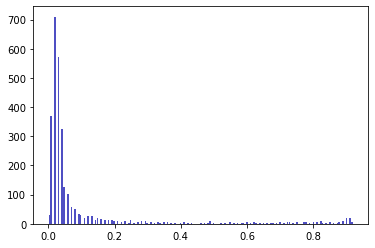

In [37]:
# visualize distribution of probabilities
import matplotlib.pyplot as plt
probs = prob_df.Probability
plt.hist(x=probs, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

In [38]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


In [40]:
precision

array([0.04988042, 0.50638298, 1.        ])

In [41]:
recall

array([1.        , 0.81506849, 0.        ])

In [45]:
from sklearn.metrics import auc
auc_score = auc(recall, precision)
auc_score

0.6653379668902389

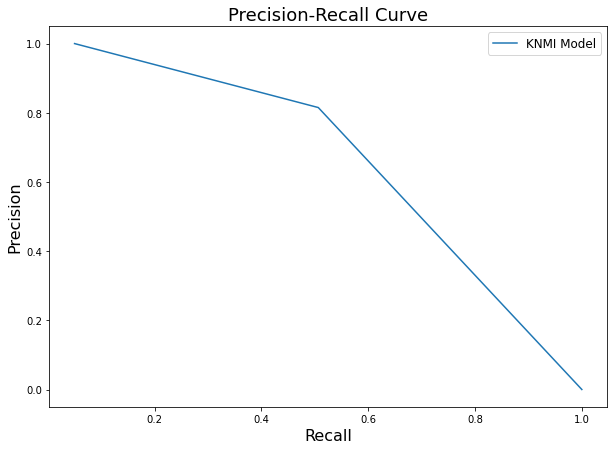

In [48]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(precision, recall, label = 'KNMI Model')
plt.title('Precision-Recall Curve', fontsize = 18)
plt.ylabel('Precision', fontsize = 16)
plt.xlabel('Recall', fontsize = 16)
plt.legend(fontsize = 12, loc = 'upper right')
plt.savefig(model_path + 'KNMI_prerec.jpg')

## **View a few images to check probability of fog**

In [43]:
# define model output path
#out_path = '/home/ubuntu/michael/model_output/KNMI/Day/'
out_path = '/home/ubuntu/michael/model_output/KNMI/Night/'

In [44]:
# select image from index to identify probability and display
img_fn = prob_df.iloc[111].Filename
img_prob = (prob_df.iloc[111].Probability)
print(img_prob)

0.82


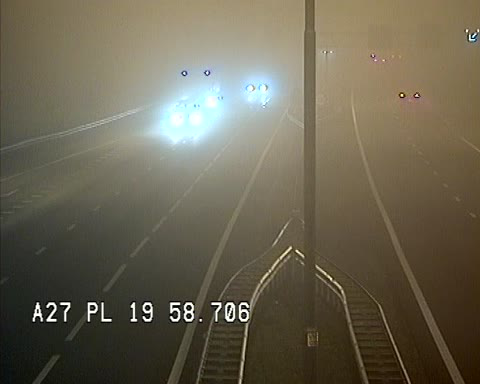

In [45]:
# importing Image class from PIL package 
from PIL import Image, ImageDraw, ImageFont
  
# creating a object 
im = Image.open(img_path + '/' + img_fn) 
im.show()

In [48]:
# turns values greater than 0.5 to 1.0 and values equal to or less than 0.5 to 0
y_pred = (probs > 0.5).astype('int32')
len(y_pred)
y_pred[1]

0

## **Identify and visualize test images with High probability of being fog**

In [49]:
# subset dataframe for test images with high probability of being fog
t_img_hprob_df = prob_df[prob_df.Probability > 0.55]
len(t_img_hprob_df)

# extract a random sample of 12 images for visualization
hprob_sample_df = t_img_hprob_df.sample(n = 15, replace = False, axis=None)

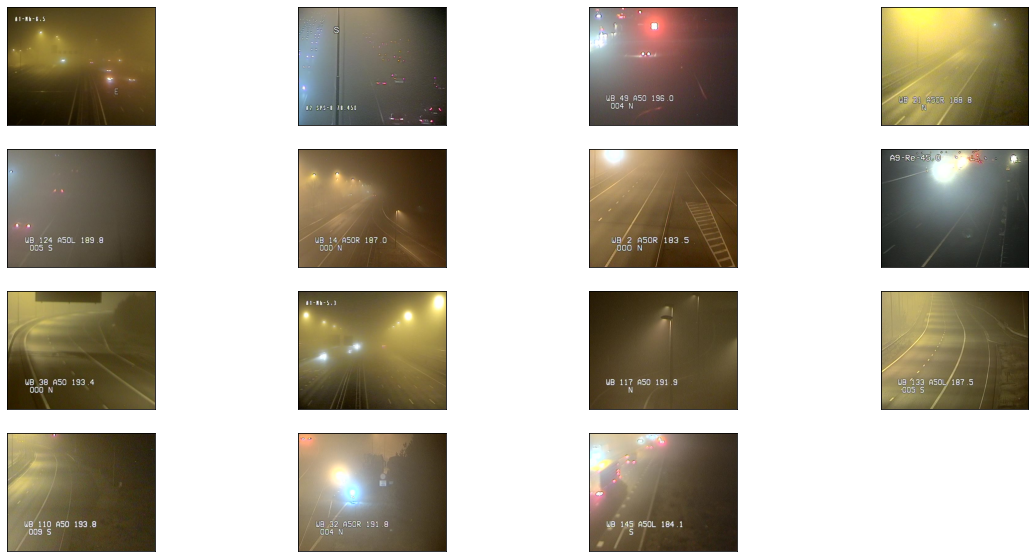

In [50]:
# visualize images identified as high probabiity of being fog
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, fn in enumerate(hprob_sample_df.Filename):
    fp = os.path.join(img_path, fn)
    img = plt.imread(fp)
    axes.append(fig.add_subplot(rows, cols, i + 1))    
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)
plt.savefig(out_path + 'KNMI_Hprob.jpg')

## **Identify and visualize test images with Low probability of being fog**

In [51]:
# subset dataframe for test images with low probability of being fog
t_img_lprob_df = prob_df[prob_df.Probability < 0.45]

# extract a random sample of 12 images for visualization
lprob_sample_df = t_img_lprob_df.sample(n = 16, replace = False, axis=None)

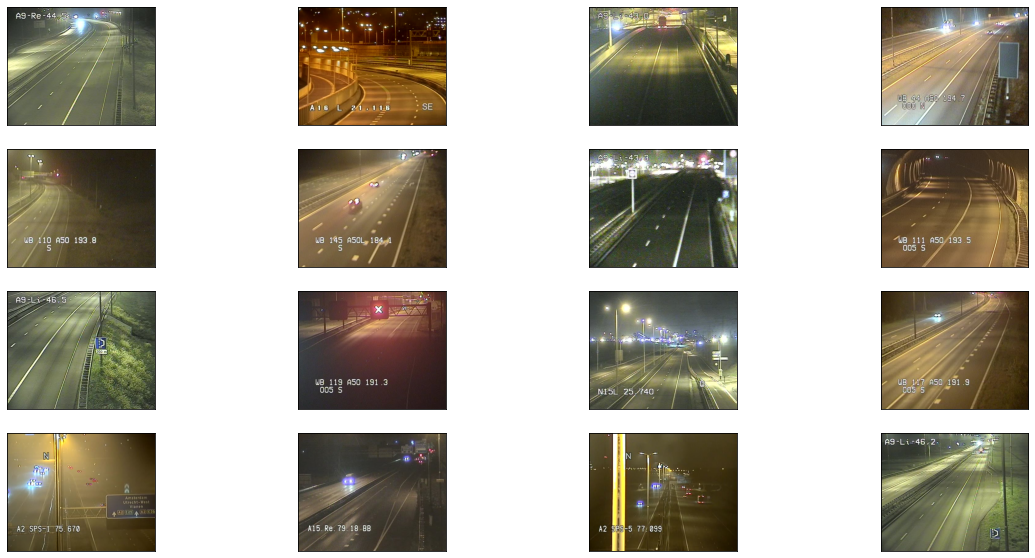

In [52]:
# visualize images identified as low probabiity of being fog
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, fn in enumerate(lprob_sample_df.Filename):
    fp = os.path.join(img_path, fn)
    img = plt.imread(fp)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)
plt.savefig(out_path + 'KNMI_Lprob.jpg')

## **Identify and visualize test images with that are borderline cases fog**

In [53]:
# subset dataframe for test images that are borderline
t_img_bprob_df = prob_df[(prob_df.Probability >= 0.49) & (prob_df.Probability <= 0.51)]
len(t_img_bprob_df)

13

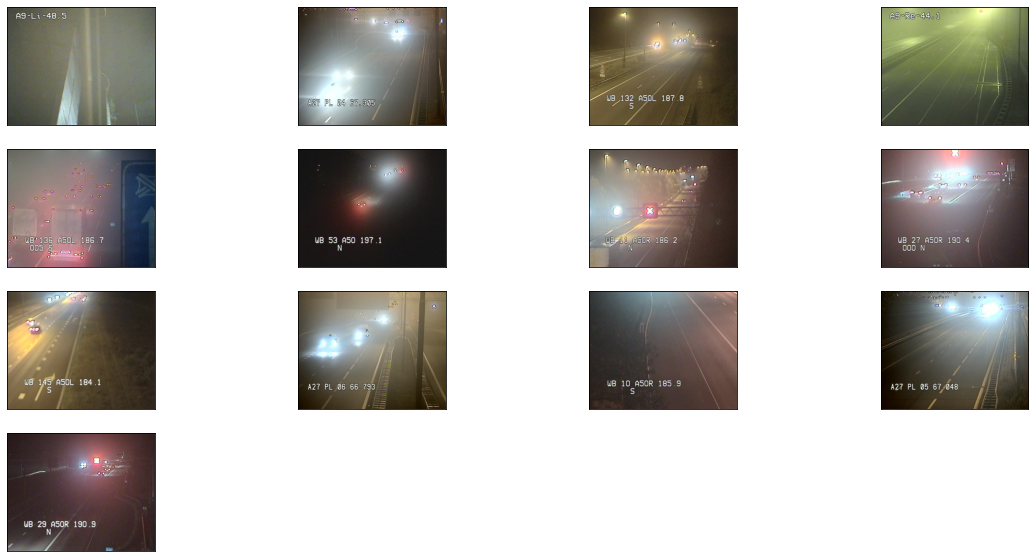

In [54]:
# visualize images identified as being borderline cases
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, fn in enumerate(t_img_bprob_df.Filename):
    fp = os.path.join(img_path, fn)
    img = plt.imread(fp)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)
plt.savefig(out_path + 'KNMI_border.jpg')

## **Build confusion matrix and visualize metrics**

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

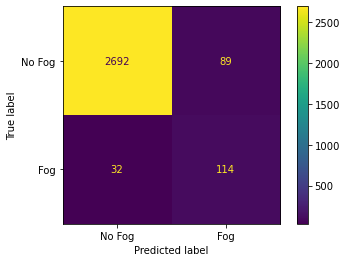

In [56]:
# create confusion matrix
labels = ['No Fog', 'Fog']
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.savefig(out_path + 'KNMI_cm.jpg')

In [57]:
import pickle
from sklearn.metrics import classification_report
cr = classification_report(y_true, y_pred, target_names=labels)
print(cr)
# save classification rerport
with open(out_path + 'KNMI_cr.pkl', 'wb') as f:pickle.dump(cr, f)

              precision    recall  f1-score   support

      No Fog       0.99      0.97      0.98      2781
         Fog       0.56      0.78      0.65       146

    accuracy                           0.96      2927
   macro avg       0.77      0.87      0.82      2927
weighted avg       0.97      0.96      0.96      2927



## **Create ROC graph and display AUC**

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_true, y_pred)
auc = auc(fpr, tpr)
# save classification rerport
with open(out_path + 'KNMI_AUC.pkl', 'wb') as f:pickle.dump(auc, f)
auc

0.8744095205725742

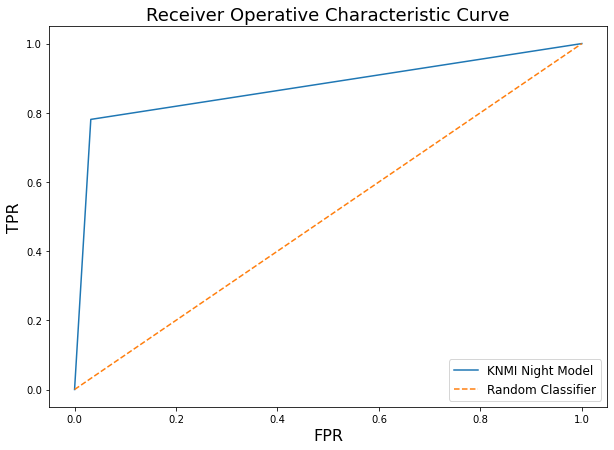

In [59]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(fpr, tpr, label = 'KNMI Night Model')
ax.plot(np.linspace(0, 1, 100),
        np.linspace(0, 1, 100),
        label = 'Random Classifier',
        linestyle = '--')
plt.title('Receiver Operative Characteristic Curve', fontsize = 18)
plt.ylabel('TPR', fontsize = 16)
plt.xlabel('FPR', fontsize = 16)
plt.legend(fontsize = 12, loc = 'lower right')
plt.savefig(out_path + 'KNMI_roc.jpg')

## **Identify and Visualize False Positives**

In [60]:
prob_df.head()

,Filename,Probability,y_pred,y_true
0,A27-HM645-ID10971_20190322_0230.jpg,0.90,1,1
1,A27-HM657-ID10966_20190425_2200.jpg,0.05,0,1
2,A9-HM427-ID12855_20190324_0500.jpg,0.07,0,1
3,A1-HM61-ID12961_20190429_2141.jpg,0.04,0,1
4,A27-HM645-ID10971_20190322_0150.jpg,0.90,1,1


In [61]:
# find images in test dataframe that are false positive
fp = prob_df[(prob_df.y_true == 0) & (prob_df.y_pred == 1)]
len(fp)

116

In [62]:
# get the list of false positive filenames
fp_filenames = fp.Filename.values
len(fp_filenames)

116

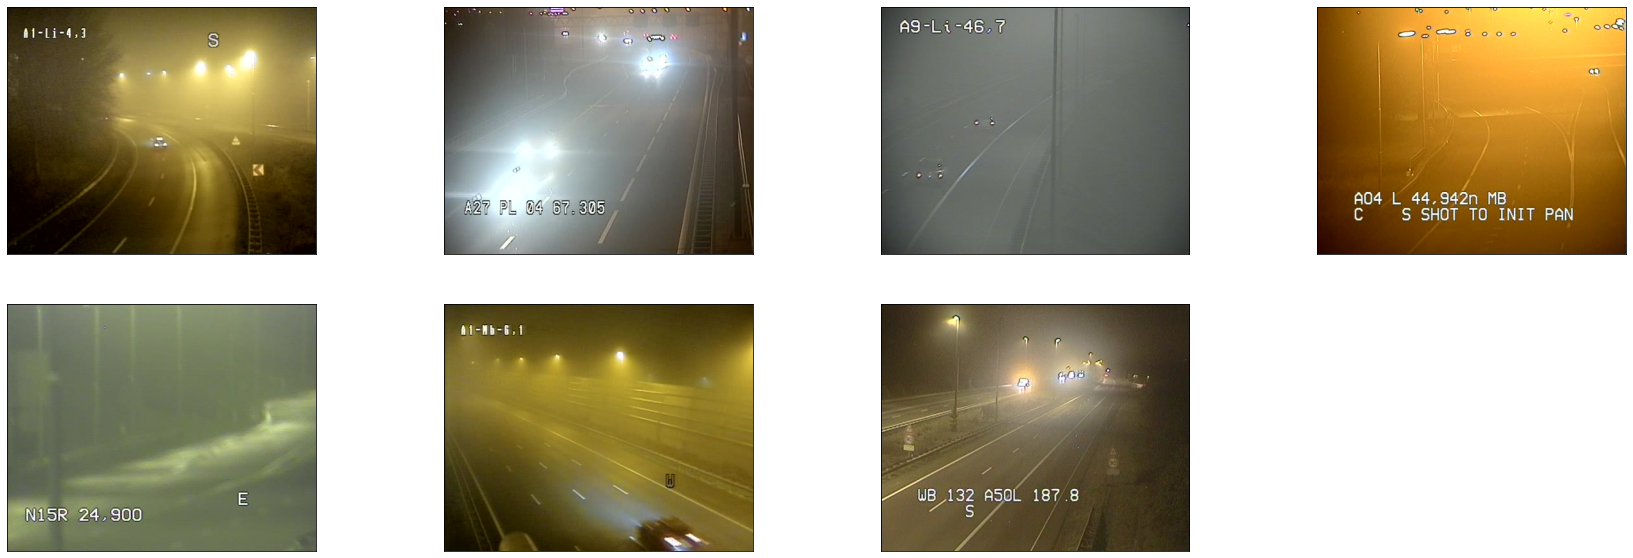

In [63]:
# visualize the false positives
rows = 2
cols = 4
axes =[]

fig = plt.figure(figsize = (30, 10))

for i in range((rows*cols)-1):
    path = os.path.join(img_path, fp_filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i + 1)) # add 1 b/c 
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)
plt.savefig(out_path + 'KNMI_fp.jpg')

## **Identify and visualize false negatives**

In [64]:
# find images in test dataframe that are false negative
fn = prob_df[(prob_df.y_true == 1) & (prob_df.y_pred == 0)]
len(fn)

27

In [65]:
# get the list of false negative filenames
fn_filenames = fn.Filename.values
len(fn_filenames)

27

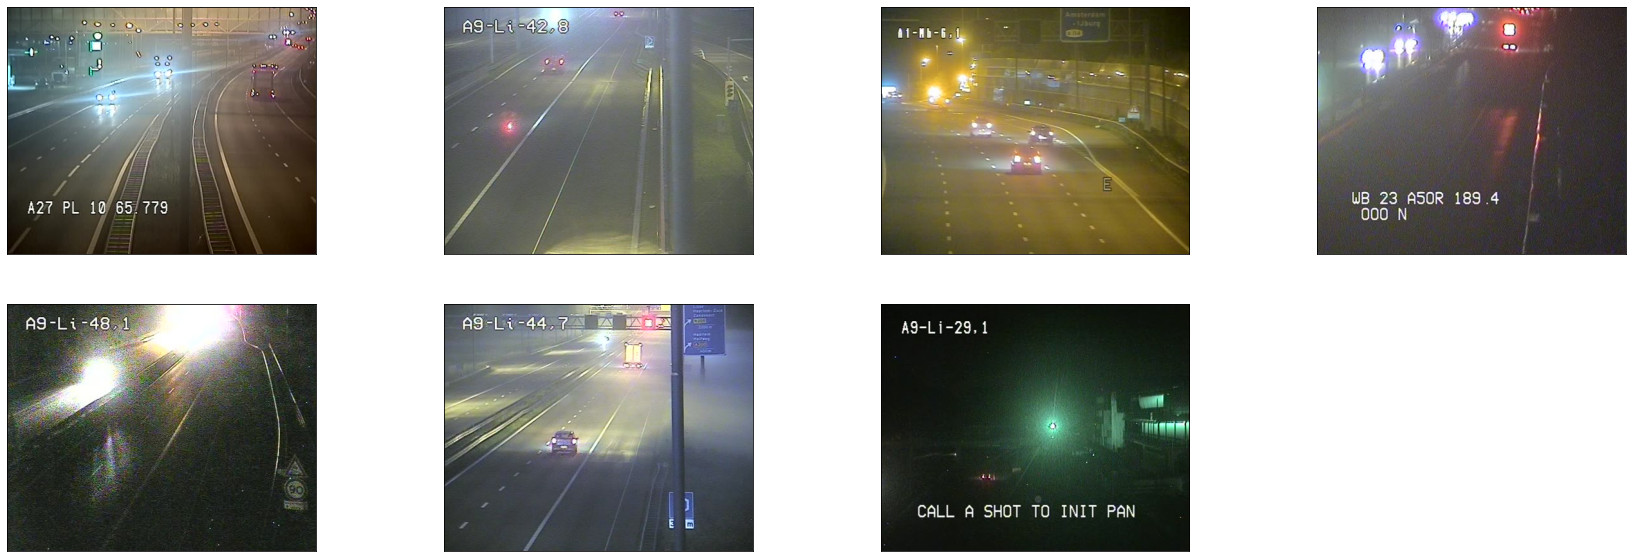

In [68]:
# visualize the false negative images
rows = 2
cols = 4
axes =[]

fig = plt.figure(figsize = (30, 10))

for i in range((rows*cols)-1):
    path = os.path.join(img_path, fn_filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i + 1)) # add 1 b/c 
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)
plt.savefig(out_path + 'KNMI_fn.jpg')